# Objective – Phase 1	 

Explore the predictor variables individually with the target variable of whether the customer 
bought the insurance product. 
- Summarize only the significant variables in a table ranking from most significant to least 
significant – the Bank currently uses 𝛼 = 0.002, but is open to another if you defend 
your reason. 
    - This table should separate out the four possible classes of variables – binary, 
ordinal, nominal, continuous. 
  
    - (HINT: Explore the predictor variables individually for now since you have not 
yet accounted for missing values.) 
  
    - (HINT: The downside to software sometimes is displaying a full p-value for 
ranking. That doesn’t mean you cannot get them through the right commands. 
As long as you have the same degrees of freedom you can rank on test statistic 
as well.) 
  
  
- In an appendix, include a table with all of the variables ranked by significance. 

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv("insurance_t.csv")
df = df.dropna()
df.head(25)

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,TELLER,SAV,SAVBAL,ATM,ATMAMT,POS,POSAMT,CD,CDBAL,IRA,IRABAL,LOC,LOCBAL,INV,INVBAL,ILS,ILSBAL,MM,MMBAL,MMCRED,MTG,MTGBAL,CC,CCBAL,CCPURC,SDB,INCOME,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES
0,0.7,1,1986.81,1,446.93,0,1,1,0,0.00,0.0,0,0,0.00,1,268.88,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,0.00,1.0,0,4.0,1.0,7.0,87.0,51.0,674.0,0,1,0,B2,R
1,4.1,0,0.00,0,0.00,0,0,0,0,0.00,0.0,0,0,0.00,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,0.00,0.0,0,30.0,1.0,8.5,97.0,60.0,640.0,0,1,1,B3,S
2,12.3,1,1069.78,5,6813.58,0,13,1,0,0.00,2.0,9,0,0.00,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,38.62,0.0,0,19.0,0.0,3.0,107.0,55.0,662.0,0,1,1,B7,U
12,3.9,1,1396.35,4,3599.73,0,14,1,1,23.45,1.0,0,0,0.00,1,949.88,6.0,349.63,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,4244.01,0.0,1,81.0,1.0,7.5,132.0,22.0,631.0,0,1,0,B1,R
13,3.9,1,35676.34,2,11578.68,0,6,1,0,0.00,0.0,2,0,0.00,1,32.98,0.0,0.00,0,0,0,0.0,1,16753.76,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,16697.06,0.0,0,20.0,1.0,9.0,148.0,45.0,639.0,0,1,1,B2,R
14,3.8,1,4494.62,2,4276.89,0,12,1,0,0.00,0.0,0,1,16659.84,1,11.39,0.0,0.00,1,12700,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,274.81,0.0,0,233.0,1.0,7.0,216.0,27.0,635.0,0,1,1,B3,R
15,7.0,1,5663.56,2,2223.36,0,6,1,0,0.00,0.0,0,1,16570.04,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,0.0,0.00,0.0,0,32.0,0.0,3.5,118.0,30.0,629.0,0,1,0,B17,R
16,0.6,1,5112.49,6,8887.20,0,15,1,0,0.00,2.0,2,1,174.47,1,0.00,5.0,799.05,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,1.0,2974.99,1.0,0,61.0,1.0,7.0,124.0,34.0,684.0,0,1,0,B9,S
17,2.0,1,247.64,3,558.42,0,3,0,0,0.00,0.0,0,1,29.19,1,0.00,1.0,21.26,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,0,0.00,0,0,0.0,0.0,0.00,0.0,0,26.0,1.0,9.5,83.0,37.0,618.0,0,1,0,B1,R
18,4.4,0,0.00,0,0.00,0,0,0,0,0.00,0.0,0,0,0.00,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.00,1,15106.05,0,0,0.0,0.0,0.00,0.0,1,80.0,1.0,8.0,113.0,72.0,721.0,0,0,0,B5,R


## separating out the four possible classes of variables – binary, ordinal, nominal, continuous.
 

In [3]:
def find_binary_continuous(df):
    binary_cols = []
    continuous_cols = []

    for column in df.columns:
        unique_values = df[column].nunique()
        dtype = df[column].dtype
        
        if unique_values == 2:
            binary_cols.append(column)
        elif pd.api.types.is_numeric_dtype(df[column]):
            # A column is considered continuous if it has many unique values
            if unique_values > 70:  # Threshold for considering a column continuous
                continuous_cols.append(column)
    
    # Create a new DataFrame with only the columns that are not binary or continuous
    nom_ord_df = df.drop(columns=binary_cols + continuous_cols)
    
    return binary_cols, continuous_cols, nom_ord_df

binary_cols, continuous_cols, nom_ord_df = find_binary_continuous(df)

In [4]:
binary_cols

['DDA',
 'DIRDEP',
 'NSF',
 'SAV',
 'ATM',
 'CD',
 'IRA',
 'LOC',
 'INV',
 'ILS',
 'MM',
 'MTG',
 'CC',
 'SDB',
 'HMOWN',
 'MOVED',
 'INAREA',
 'INS']

In [5]:
continuous_cols

['ACCTAGE',
 'DDABAL',
 'DEPAMT',
 'NSFAMT',
 'SAVBAL',
 'ATMAMT',
 'POSAMT',
 'CDBAL',
 'IRABAL',
 'LOCBAL',
 'INVBAL',
 'ILSBAL',
 'MMBAL',
 'MTGBAL',
 'CCBAL',
 'INCOME',
 'HMVAL',
 'AGE',
 'CRSCORE']

In [6]:
nom_ord_df

,DEP,CASHBK,CHECKS,PHONE,TELLER,POS,MMCRED,CCPURC,LORES,BRANCH,RES
0,1,0,1,0.0,0,0.0,0,1.0,7.0,B2,R
1,0,0,0,0.0,0,0.0,0,0.0,8.5,B3,S
2,5,0,13,2.0,9,0.0,0,0.0,3.0,B7,U
12,4,0,14,1.0,0,6.0,0,0.0,7.5,B1,R
13,2,0,6,0.0,2,0.0,0,0.0,9.0,B2,R
...,...,...,...,...,...,...,...,...,...,...,...
8488,0,0,0,0.0,0,0.0,0,0.0,6.5,B1,R
8489,5,0,9,1.0,3,11.0,0,1.0,9.5,B4,S
8490,2,0,7,2.0,1,0.0,0,1.0,4.5,B2,R
8492,3,0,9,0.0,11,0.0,0,0.0,8.5,B3,U


In [7]:
nominal_cols = ['BRANCH', 'RES']
ordinal_cols = ['CASHBK', 'MMCRED', 'CCPURC']
# would 'DEP', 'CASHBK', 'CHECKS', 'PHONE', 'TELLER', 'MMCRED', 'CCPURC' be continous? 
for x in ['LORES', 'DEP', 'CHECKS', 'PHONE', 'TELLER', 'POS']:
    continuous_cols.append(x)
binary_cols.remove('INS')


In [13]:
print(binary_cols)

['DDA', 'DIRDEP', 'NSF', 'SAV', 'ATM', 'CD', 'IRA', 'LOC', 'INV', 'ILS', 'MM', 'MTG', 'CC', 'SDB', 'HMOWN', 'MOVED', 'INAREA']


## checking if varriabels are a good predictor of 


In [9]:
df_encoded = pd.get_dummies(df, columns=['BRANCH', 'RES'], drop_first=True, dtype=int)
encoded_list = list(df_encoded.iloc[:,-16:].columns)
df_encoded.head()

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,TELLER,SAV,SAVBAL,ATM,ATMAMT,POS,POSAMT,CD,CDBAL,IRA,IRABAL,LOC,LOCBAL,INV,INVBAL,ILS,ILSBAL,MM,MMBAL,MMCRED,MTG,MTGBAL,CC,CCBAL,CCPURC,SDB,INCOME,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH_B10,BRANCH_B11,BRANCH_B12,BRANCH_B13,BRANCH_B16,BRANCH_B17,BRANCH_B2,BRANCH_B3,BRANCH_B4,BRANCH_B5,BRANCH_B6,BRANCH_B7,BRANCH_B8,BRANCH_B9,RES_S,RES_U
0,0.7,1,1986.81,1,446.93,0,1,1,0,0.00,0.0,0,0,0.0,1,268.88,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,0.00,1.0,0,4.0,1.0,7.0,87.0,51.0,674.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4.1,0,0.00,0,0.00,0,0,0,0,0.00,0.0,0,0,0.0,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,0.00,0.0,0,30.0,1.0,8.5,97.0,60.0,640.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,12.3,1,1069.78,5,6813.58,0,13,1,0,0.00,2.0,9,0,0.0,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,38.62,0.0,0,19.0,0.0,3.0,107.0,55.0,662.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
12,3.9,1,1396.35,4,3599.73,0,14,1,1,23.45,1.0,0,0,0.0,1,949.88,6.0,349.63,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,4244.01,0.0,1,81.0,1.0,7.5,132.0,22.0,631.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,3.9,1,35676.34,2,11578.68,0,6,1,0,0.00,0.0,2,0,0.0,1,32.98,0.0,0.00,0,0,0,0.0,1,16753.76,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,16697.06,0.0,0,20.0,1.0,9.0,148.0,45.0,639.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [10]:
import statsmodels.api as sm

def logistic_regression_summary(X, y):
    model = sm.Logit(y, sm.add_constant(X))
    result = model.fit()
    p_value = result.pvalues[1]  # p-value for the variable
    return p_value

# Initialize lists for summary
results = []

# Analyze binary variables
for var in binary_cols:
    p_value = logistic_regression_summary(df[var], df['INS'])
    results.append({'Variable': var, 'Type': 'Binary', 'P-Value': p_value})

# Analyze ordinal variables
for var in ordinal_cols:
    p_value = logistic_regression_summary(df[var], df['INS'])
    results.append({'Variable': var, 'Type': 'Ordinal', 'P-Value': p_value})

# Analyze nominal variables
for var in encoded_list:
    p_value = logistic_regression_summary(df_encoded[var], df_encoded['INS'])
    results.append({'Variable': var, 'Type': 'Nominal', 'P-Value': p_value})

# Analyze continuous variables
for var in continuous_cols:
    p_value = logistic_regression_summary(df[var], df['INS'])
    results.append({'Variable': var, 'Type': 'Continuous', 'P-Value': p_value})

# Create a DataFrame for the summary
summary_df = pd.DataFrame(results)
summary_df['Significant'] = summary_df['P-Value'] < 0.002
summary_df_sorted = summary_df.sort_values(by='P-Value')

Optimization terminated successfully.
         Current function value: 0.628158
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646008
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646018
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637297
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.639993
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629413
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.639655
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648584
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.643331
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648820
  

C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

Optimization terminated successfully.
         Current function value: 0.646527
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648820
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648804
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.647094
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.647943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643693
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.645174
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648644
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648602
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648869
  

C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

Optimization terminated successfully.
         Current function value: 0.648860
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648838
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648869
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648766
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648867
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648839
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648794
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648640
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648838
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648607
  

C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

Optimization terminated successfully.
         Current function value: 0.648636
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.632980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.644075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.648772
         Iterations 4


C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

Optimization terminated successfully.
         Current function value: 0.648345
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648860
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.633668
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648686
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648474
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648859
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645463
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648718
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648815
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.648853
  

C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

Optimization terminated successfully.
         Current function value: 0.647995
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.646821
         Iterations 5


C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable
C:\Users\Sterling Hayden\AppData\Local\Temp\ipykernel_10228\3557435785.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]  # p-value for the variable


In [22]:
pd.set_option('display.max_rows', 500)
summary_df_sorted.to_csv(path_or_buf='summary_df_sorted.csv')
summary_df_sorted

,Variable,Type,P-Value,Significant
0,DDA,Binary,1.299981e-50,True
5,CD,Binary,1.362723e-46,True
10,MM,Binary,4.981446e-41,True
48,MMBAL,Continuous,1.112094e-34,True
40,SAVBAL,Continuous,4.858051e-32,True
3,SAV,Binary,5.051441e-29,True
56,DEP,Continuous,6.036803e-24,True
4,ATM,Binary,7.598621e-23,True
43,CDBAL,Continuous,8.112826e-23,True
6,IRA,Binary,1.360719e-22,True


In [14]:
summary_df_sorted['Significant'].value_counts()

Significant
False    33
True     28
Name: count, dtype: int64

In [23]:
akshay_df = pd.read_csv('output.csv')
akshay_df.sort_values('p_value')

,var_names,p_value,var_type
30,CD,2.969930e-78,binary
25,DDA,5.504661e-70,binary
35,MM,7.450502e-57,binary
6,SAVBAL,7.821331e-48,continuous
17,MMBAL,3.576739e-47,continuous
28,SAV,1.442705e-39,binary
2,DEP,2.312173e-38,continuous
31,IRA,4.891746e-37,binary
10,CDBAL,1.052622e-36,continuous
37,CC,2.438849e-32,binary


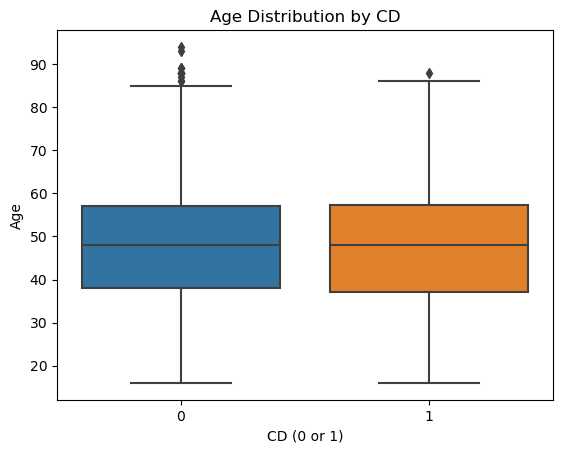

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='CD', y='AGE', data=df)
plt.title('Age Distribution by CD')
plt.xlabel('CD (0 or 1)')
plt.ylabel('Age')
plt.show()
